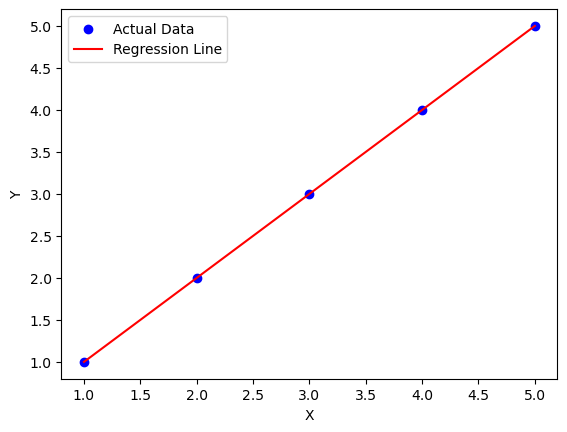

Slope (m): 1.0000000000000002
Intercept (b): -8.881784197001252e-16


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent Variable
Y = np.array([1, 2, 3, 4, 5])  # Dependent Variable

# Create Model
model = LinearRegression()
model.fit(X, Y)

# Prediction
Y_pred = model.predict(X)

# Plotting Results
plt.scatter(X, Y, color='blue', label="Actual Data")
plt.plot(X, Y_pred, color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Coefficients
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)


logistic Regression algorithm

   Study Hours  Result
0     3.745401       0
1     9.507143       1
2     7.319939       1
3     5.986585       1
4     1.560186       0
Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[11  0]
 [ 0  9]]


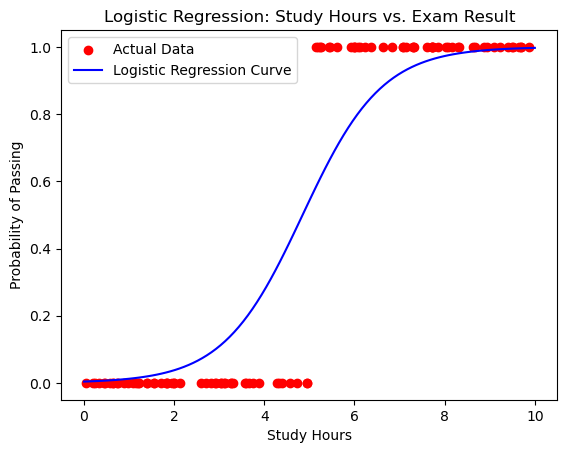

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Create a dataset (Study Hours vs. Exam Result)
np.random.seed(42)
study_hours = np.random.uniform(0, 10, 100)  # Generate 100 random study hours between 0-10
exam_result = (study_hours > 5).astype(int)  # Pass (1) if hours > 5, else Fail (0)

# Convert to DataFrame for easy visualization
df = pd.DataFrame({'Study Hours': study_hours, 'Result': exam_result})
print(df.head())

# Step 2: Prepare data
X = study_hours.reshape(-1, 1)  # Convert to 2D array for model
y = exam_result

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 8: Visualization
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)  # Generate values from 0 to 10
X_plot_scaled = scaler.transform(X_plot)  # Scale them
y_prob = model.predict_proba(X_plot_scaled)[:, 1]  # Probability of passing

plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_plot, y_prob, label='Logistic Regression Curve', color='blue')
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression: Study Hours vs. Exam Result")
plt.legend()
plt.show()


KNN (K- Nearest Neighbors) algorithm

The new movie is classified as: Action


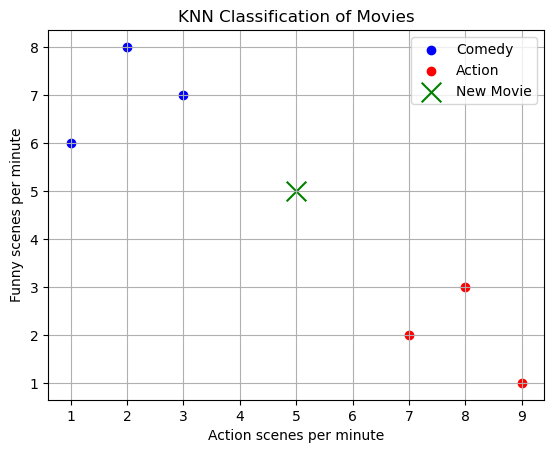

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

def knn_classify(k, data, labels, new_point):
    distances = [(euclidean_distance(new_point, data[i]), labels[i]) for i in range(len(data))]
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = [distances[i][1] for i in range(k)]
    most_common = Counter(nearest_neighbors).most_common(1)
    return most_common[0][0]

# Example dataset: [Feature1, Feature2] - e.g., Action scenes per minute, Funny scenes per minute
data = [
    [3, 7],  # Comedy
    [2, 8],  # Comedy
    [1, 6],  # Comedy
    [8, 3],  # Action
    [7, 2],  # Action
    [9, 1],  # Action
]

labels = ["Comedy", "Comedy", "Comedy", "Action", "Action", "Action"]

# New movie to classify
new_movie = [5, 5]

# Classify using k=3
k = 3
prediction = knn_classify(k, data, labels, new_movie)
print(f"The new movie is classified as: {prediction}")

# Plot the data
colors = {"Comedy": "blue", "Action": "red"}
for i in range(len(data)):
    plt.scatter(data[i][0], data[i][1], color=colors[labels[i]], label=labels[i] if labels[i] not in plt.gca().get_legend_handles_labels()[1] else "")

plt.scatter(new_movie[0], new_movie[1], color="green", marker="x", s=200, label="New Movie")
plt.xlabel("Action scenes per minute")
plt.ylabel("Funny scenes per minute")
plt.title("KNN Classification of Movies")
plt.legend()
plt.grid()
plt.show()


Naive bayes classification

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB

# Step 1: Sample data
data = {
    'Cough': ['yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no'],
    'Fever': ['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes'],
    'Fatigue': ['yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes'],
    'Illness': ['COVID', 'Flu', 'Fever', 'COVID', 'Fever', 'Flu', 'Fever', 'COVID', 'Flu', 'Fever']
}

df = pd.DataFrame(data)

# Step 2: Encode text labels to numbers
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Save encoders for decoding later

# Step 3: Features and label
X = df[['Cough', 'Fever', 'Fatigue']]
y = df['Illness']

# Step 4: Train Naive Bayes model
model = CategoricalNB()
model.fit(X, y)

# Step 5: Predict a new case (e.g. Cough=yes, Fever=yes, Fatigue=no)
# Remember: 'yes' → 1, 'no' → 0 (from our label encoding)
new_case = [[1, 1, 0]]  # A person with Cough=yes, Fever=yes, Fatigue=no
prediction_encoded = model.predict(new_case)

# Decode prediction back to original illness label
predicted_illness = label_encoders['Illness'].inverse_transform(prediction_encoded)

print("Predicted Illness:", predicted_illness[0])


Predicted Illness: COVID


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


Support vactor machine

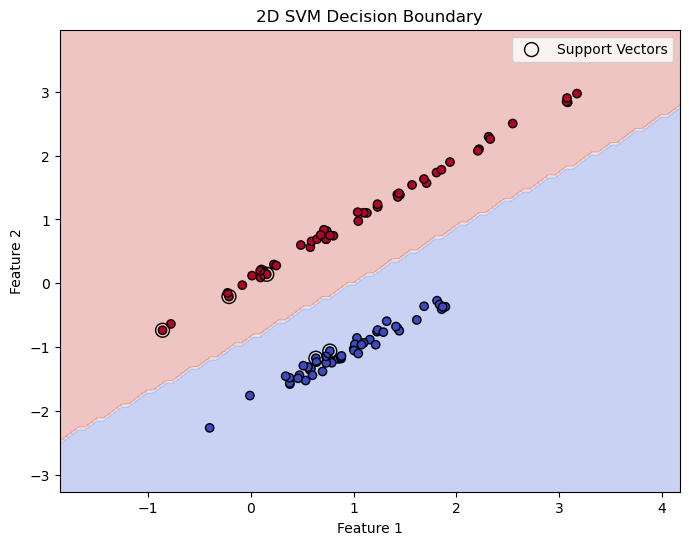

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate synthetic 2D dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Train an SVM model
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='black', label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D SVM Decision Boundary')
plt.legend()
plt.show()


Neural Network